# Linear Regression

* **Simple Linear Regression:** It is to find the linear function that express the relationship between the dependent and independent ***variable***.

* **Multiple Linear Regression:** It is to find the linear function that express the relationship between the dependent and independent ***variables***.

# Import Necessary Libraries

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.4f" % x)

import warnings
warnings.filterwarnings("ignore")

In [2]:
advertising = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/advertising.csv")
df = advertising.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1000,37.8000,69.2000,22.1000
1,44.5000,39.3000,45.1000,10.4000
2,17.2000,45.9000,69.3000,9.3000
3,151.5000,41.3000,58.5000,18.5000
4,180.8000,10.8000,58.4000,12.9000


# General Information About to Dataset

In [3]:
def check_df(dataframe,head=5):
  print("######################### Head #########################")
  print(dataframe.head(head))
  print("######################### Tail #########################")
  print(dataframe.tail(head))
  print("######################### Shape #########################")
  print(dataframe.shape)
  print("######################### Types #########################")
  print(dataframe.dtypes)
  print("######################### NA #########################")
  print(dataframe.isnull().sum())
  print("######################### Qurtiles #########################")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [4]:
check_df(df)

######################### Head #########################
        TV   radio  newspaper   sales
0 230.1000 37.8000    69.2000 22.1000
1  44.5000 39.3000    45.1000 10.4000
2  17.2000 45.9000    69.3000  9.3000
3 151.5000 41.3000    58.5000 18.5000
4 180.8000 10.8000    58.4000 12.9000
######################### Tail #########################
          TV   radio  newspaper   sales
195  38.2000  3.7000    13.8000  7.6000
196  94.2000  4.9000     8.1000  9.7000
197 177.0000  9.3000     6.4000 12.8000
198 283.6000 42.0000    66.2000 25.5000
199 232.1000  8.6000     8.7000 13.4000
######################### Shape #########################
(200, 4)
######################### Types #########################
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
######################### NA #########################
TV           0
radio        0
newspaper    0
sales        0
dtype: int64
######################### Qurtiles #########################
      

# Analysis of Variables

In [5]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  #Catgeorical Variable Selection
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category","object","bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8","int64","float64"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category","object"]]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  #Numerical Variable Selection
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8","int64","float64"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  return cat_cols, num_cols, cat_but_car, num_but_cat

In [6]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

#Print Categorical and Numerical Variables
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat_cols: {len(cat_cols)}")
print(f"Num_cols: {len(num_cols)}")
print(f"Cat_but_car: {len(cat_but_car)}")
print(f"Num_but_cat: {len(num_but_cat)}")

Observations: 200
Variables: 4
Cat_cols: 0
Num_cols: 4
Cat_but_car: 0
Num_but_cat: 0


In [7]:
def num_summary(dataframe, num_col, plot=False):
  print(50*"#", num_col ,50*"#")
  quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quantiles).T)

  if plot:
    dataframe[num_col].hist(bins=20)
    plt.xlabel(num_col)
    plt.ylabel(num_col)
    plt.show(block=True)

In [8]:
def num_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  for col in num_cols:
    num_summary(dataframe, col, plot=True)

################################################## TV ##################################################
count   200.0000
mean    147.0425
std      85.8542
min       0.7000
1%        5.3870
5%       13.1950
10%      24.8800
20%      59.1800
30%      86.7500
40%     119.0000
50%     149.7500
60%     186.0600
70%     210.7300
80%     228.5400
90%     261.4400
95%     280.7350
99%     292.9070
max     296.4000
Name: TV, dtype: float64


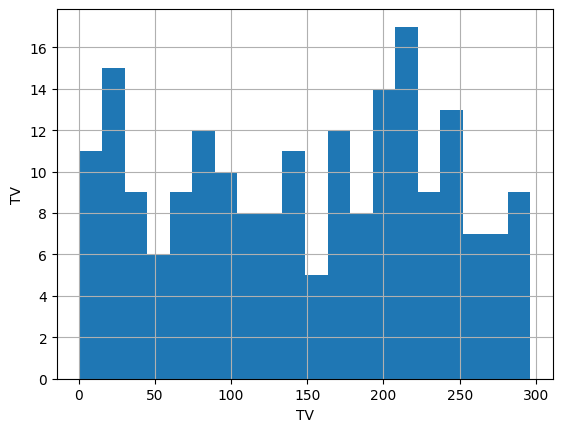

################################################## radio ##################################################
count   200.0000
mean     23.2640
std      14.8468
min       0.0000
1%        0.3990
5%        1.9950
10%       3.4000
20%       7.6800
30%      11.9400
40%      17.1200
50%      22.9000
60%      27.8600
70%      33.5000
80%      38.9200
90%      43.5200
95%      46.8100
99%      49.4000
max      49.6000
Name: radio, dtype: float64


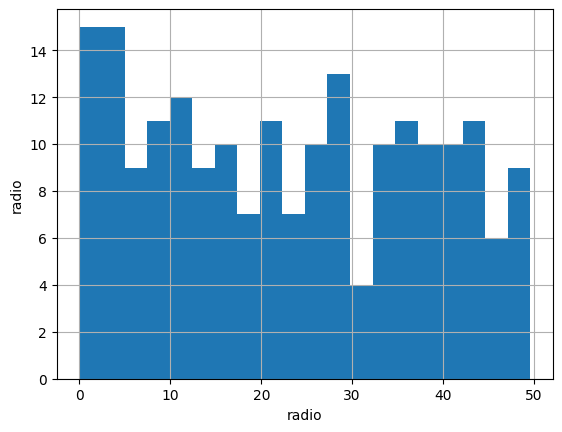

################################################## newspaper ##################################################
count   200.0000
mean     30.5540
std      21.7786
min       0.3000
1%        0.9990
5%        3.6000
10%       5.9900
20%       9.3800
30%      15.9700
40%      21.3200
50%      25.7500
60%      32.7000
70%      39.1100
80%      49.6400
90%      59.0700
95%      71.8250
99%      89.5150
max     114.0000
Name: newspaper, dtype: float64


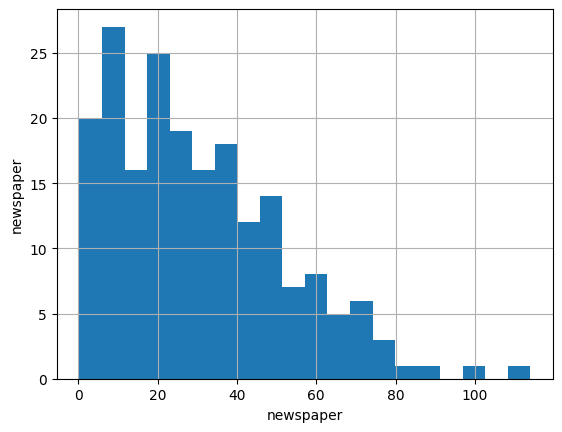

################################################## sales ##################################################
count   200.0000
mean     14.0225
std       5.2175
min       1.6000
1%        4.7840
5%        6.6000
10%       7.9600
20%       9.7000
30%      10.8700
40%      11.8000
50%      12.9000
60%      14.8000
70%      16.6000
80%      18.9200
90%      21.7100
95%      23.8000
99%      25.5070
max      27.0000
Name: sales, dtype: float64


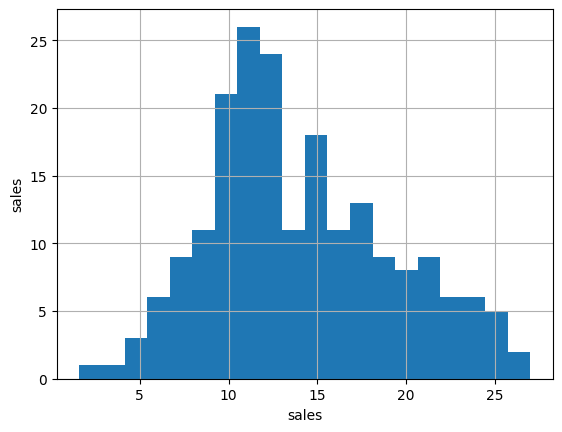

In [9]:
num_summary_df(df)

In [10]:
def plot_num_summary(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  plt.figure(figsize=(12,4))
  for index, col in enumerate(num_cols):
    plt.subplot(2,4, index+1)
    plt.tight_layout()
    dataframe[col].hist(bins=20)
    plt.title(col)

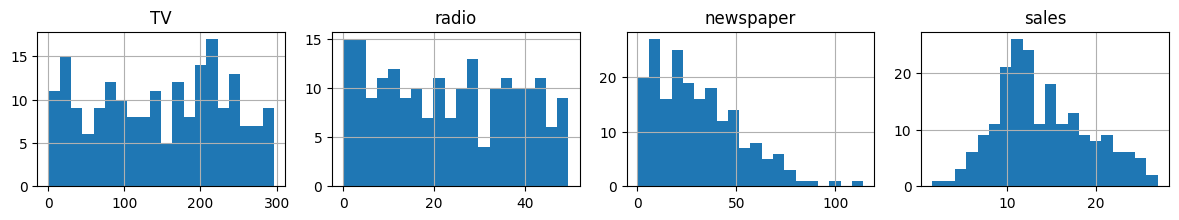

In [11]:
plot_num_summary(df)

# Correlation Analysis

In [12]:
def correlated_cols(dataframe, target, plot=False):
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8", "int64", "float64"]]
  corr = dataframe[num_cols].corr()
  print(corr)
  print(50*"#", "Correlation", 50*"#")
  print(dataframe[num_cols].corrwith(dataframe[target]).sort_values(ascending=False))

  if plot:
    sns.set(rc={'figure.figsize': (8,6)})
    sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
    plt.show()

  sns.pairplot(dataframe, kind="reg")

  for col in num_cols:
    sns.jointplot(x=col, y=target, data=dataframe, kind="reg")

              TV  radio  newspaper  sales
TV        1.0000 0.0548     0.0566 0.7822
radio     0.0548 1.0000     0.3541 0.5762
newspaper 0.0566 0.3541     1.0000 0.2283
sales     0.7822 0.5762     0.2283 1.0000
################################################## Correlation ##################################################
sales       1.0000
TV          0.7822
radio       0.5762
newspaper   0.2283
dtype: float64


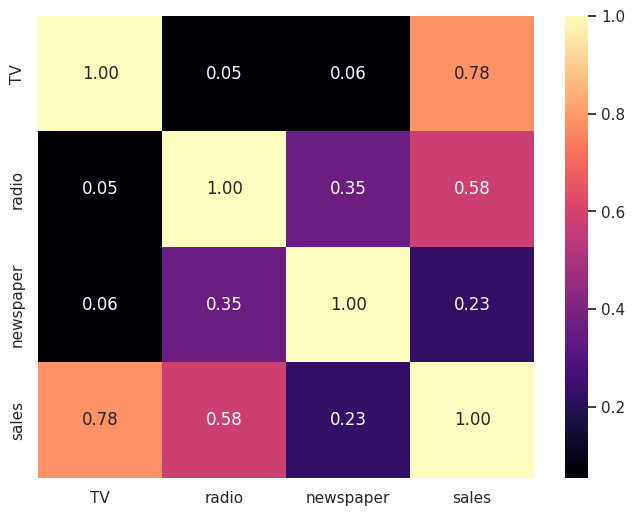

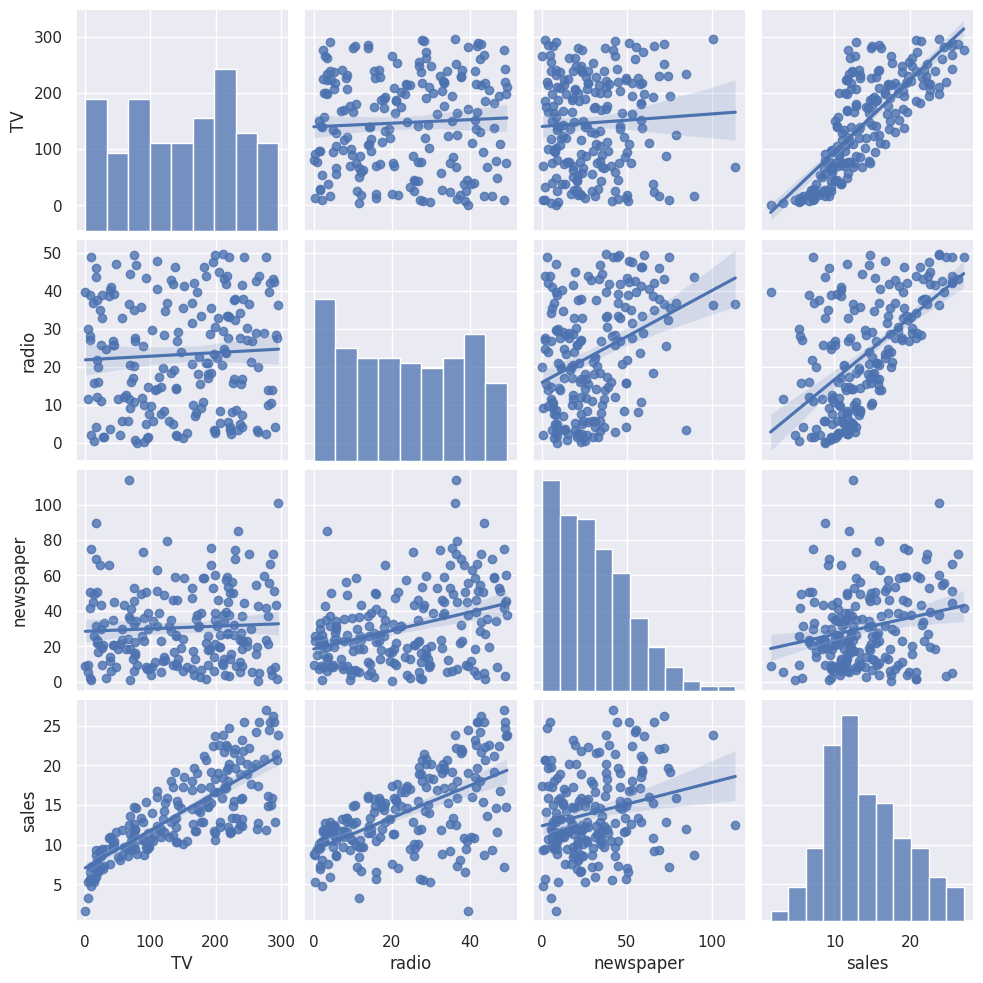

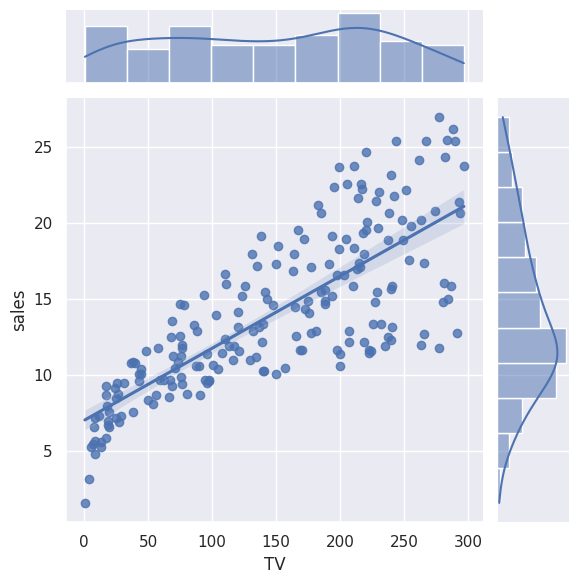

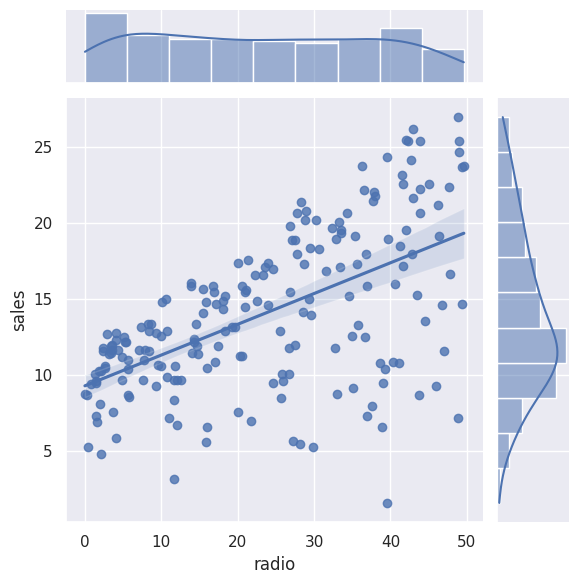

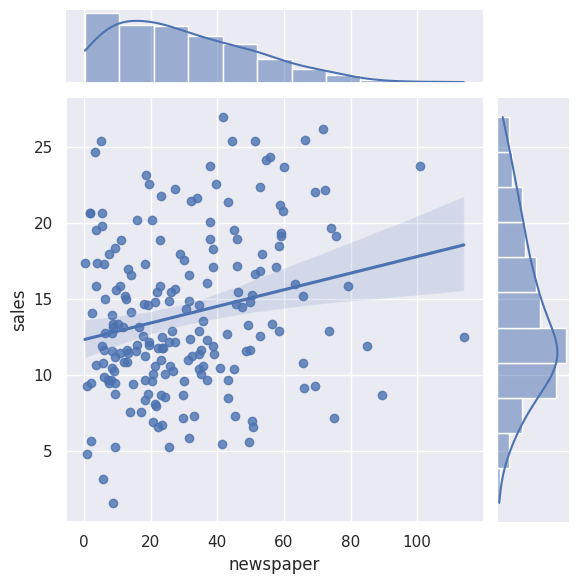

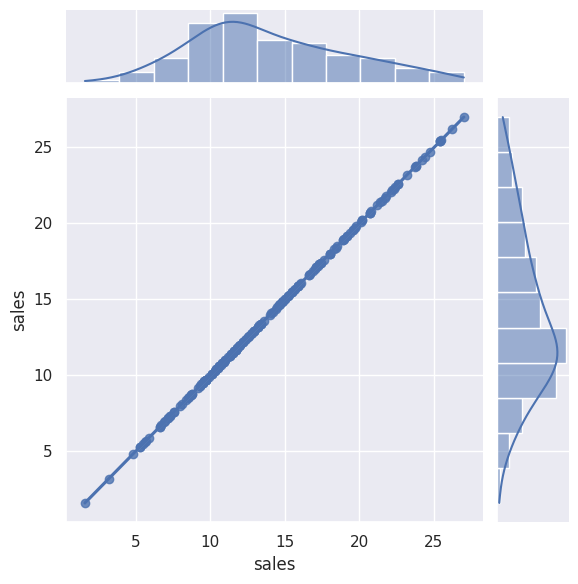

In [13]:
correlated_cols(df, "sales", plot=True)

# Simple Linear Regression with statsmodels

In [14]:
def simple_LR_modeling_with_statsmodel(dataframe, X, y, results=False, plot=False):
  X_col = X
  y_col = y
  X = dataframe[[X]]
  X = sm.add_constant(X)
  y = dataframe[y]
  lm = sm.OLS(y, X)
  model = lm.fit()
  model_equation = str(y_col) + " = " + str("%.2f" % model.params[0]) + " + " + str(X_col) + "*" + str("%.2f" % model.params[1])

  if results:
    print("f_pvalue: ", "%.3f" % model.f_pvalue)
    print("fvalue: ", "%.3f" % model.fvalue)
    print("tvalue: ", "%.3f" % model.tvalues[1])
    print("mse: ", "%.3f" % mean_squared_error(y, model.fittedvalues))
    print("rmse: ", "%.3f" % np.sqrt(mean_squared_error(y, model.fittedvalues)))
    print("Model MSE: ", "%.3f" % model.mse_model)
    print("Model rsquared: ", "%.3f" % model.rsquared)
    print("Model rsquared_Adj: ", "%.3f" % model.rsquared_adj)
    print("Model Equation: ", model_equation)
    print(model.summary())

  if plot:
    g = sns.regplot(x=dataframe[X_col], y=dataframe[y_col], scatter_kws={'color':'r','s':9})
    g.set_title(f"Model Equation:  {model_equation}")
    g.set_ylabel(y_col)
    g.set_xlabel(X_col)
    plt.xlim(dataframe[X_col].min()-10, dataframe[X_col].max()+10)
    plt.ylim(bottom=0)
    plt.show()
    plt.plot(model.resid)
    plt.title("Resid Plot")

  return model


f_pvalue:  0.000
fvalue:  312.145
tvalue:  17.668
mse:  10.513
rmse:  3.242
Model MSE:  3314.618
Model rsquared:  0.612
Model rsquared_Adj:  0.610
Model Equation:  sales = 7.03 + TV*0.05
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           1.47e-42
Time:                        08:27:15   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef  

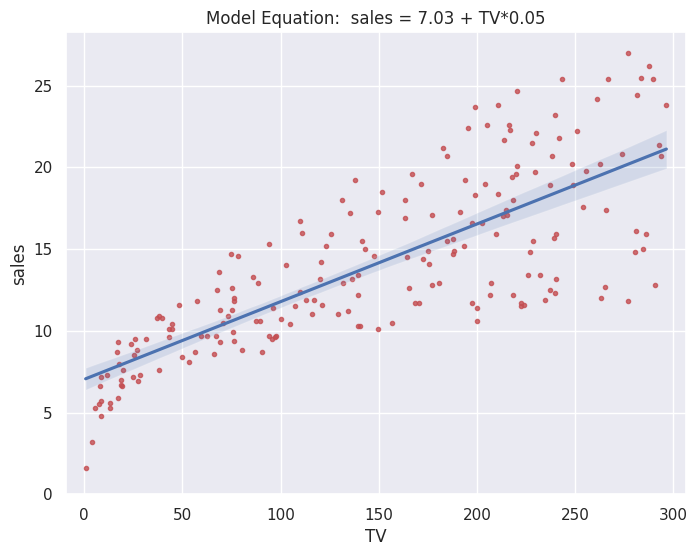

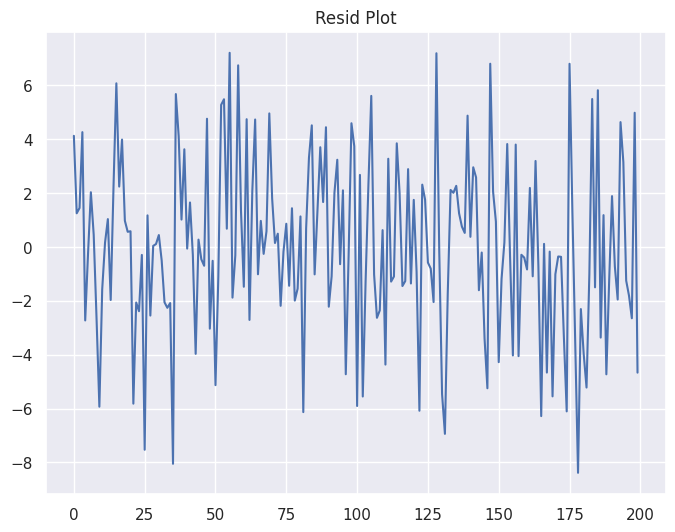

In [15]:
simple_LR_modeling_with_statsmodel(df, "TV", "sales", results=True, plot=True)

# Simple Linear Regression with LinearRegression

**Simple Linear Regression:** It is to find the linear function that express the relationship between the dependent and independent ***variable***

In [16]:
def simple_LR_modeling_with_LinearRegression(dataframe, X, y, results=False, plot=False):
  X_col = X
  y_col = y
  X = dataframe[[X]]
  y = dataframe[y]
  reg = LinearRegression()
  model = reg.fit(X.values, y)
  model_equation = str(y_col) + " = " + str("%.2f" % model.intercept_) + " + " + str(X_col) + "*" + str("%.2f" % model.coef_)

  if results:
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r_sqaure = model.score(X, y)
    print("MSE: ", "%.3f" % mse)
    print("RMSE: ", "%.3f" % rmse)
    print("MAE: ", "%.3f" % mae)
    print("R-Sqaure: ", "%.3f" % r_sqaure)

  if plot:
    g = sns.regplot(x=dataframe[X_col], y=dataframe[y_col], scatter_kws={'color':'r','s':9})
    g.set_title(f"Model Equation:  {model_equation}")
    g.set_ylabel(y_col)
    g.set_xlabel(X_col)
    plt.xlim(dataframe[X_col].min()-10, dataframe[X_col].max()+10)
    plt.ylim(bottom=0)
  return model

MSE:  10.513
RMSE:  3.242
MAE:  2.550
R-Sqaure:  0.612


LinearRegression()

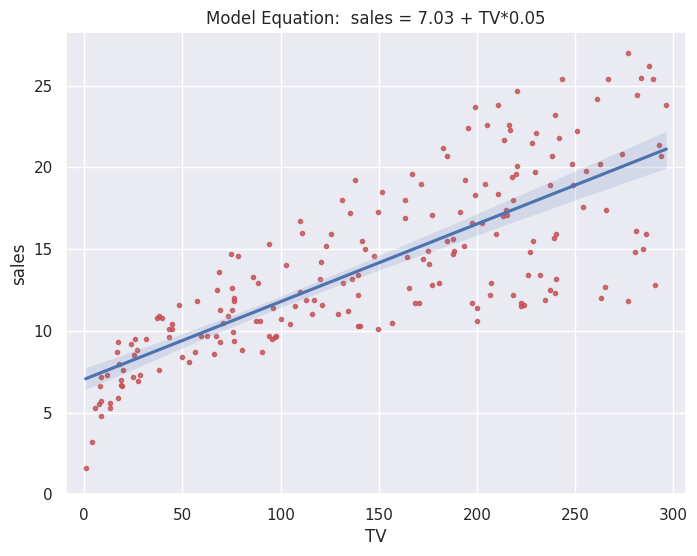

In [17]:
simple_LR_modeling_with_LinearRegression(df, "TV", "sales", results=True, plot=True)

In [18]:
def simple_LR_model_predict(dataframe, values, independent_variable, dependent_variable):
  values = pd.DataFrame([values]).T
  model = simple_LR_modeling_with_LinearRegression(dataframe, independent_variable, dependent_variable)
  print("Predict: %.4f" % model.predict(values)[0])

In [19]:
simple_LR_model_predict(df, 100, "TV", "sales")

Predict: 11.7863


# Multiple Linear Regression

**Multiple Linear Regression:** It is to find the linear function that express the relationship between the dependent and independent ***variables***

# Modeling with StatsModels

In [20]:
def MLR_modeling_with_statsmodel(dataframe, target, test_size=0.20, results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
  lm = sm.OLS(y_train, X_train)
  model = lm.fit()

  if results:
    print("f_pvalue: ", "%.3f" % model.f_pvalue)
    print("fvalue: ", "%.3f" % model.fvalue)
    print("tvalue: ", "%.3f" % model.tvalues[1])
    print("Model MSE: ", "%.3f" % model.mse_model)
    print("Model rsquared: ", "%.3f" % model.rsquared)
    print("Model rsquared_Adj: ", "%.3f" % model.rsquared_adj)
    print(model.summary())

  return model

In [21]:
MLR_modeling_with_statsmodel(df, "sales", results=True)

f_pvalue:  0.000
fvalue:  2584.220
tvalue:  18.931
Model MSE:  11486.904
Model rsquared:  0.980
Model rsquared_Adj:  0.980
                                 OLS Regression Results                                
Dep. Variable:                  sales   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              2584.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):                   2.35e-133
Time:                        08:27:17   Log-Likelihood:                         -344.86
No. Observations:                 160   AIC:                                      695.7
Df Residuals:                     157   BIC:                                      704.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                

# Modeling with LinearRegression

In [22]:
def MLR_modeling_with_LinearRegression(dataframe, target, test_size=0.20, results=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
  lm = LinearRegression()
  model = lm.fit(X_train, y_train)

  if results:
    mse_train = mean_squared_error(y_train, model.predict(X_train))
    rmse_train = np.sqrt(mse_train)
    mse_test = mean_squared_error(y_test, model.predict(X_test))
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, model.predict(X_train))
    mae_test = mean_absolute_error(y_test, model.predict(X_test))
    r2 = model.score(X, y)
    r2_train = model.score(X_train, y_train)
    r2_test = model.score(X_test, y_test)
    print("MSE_train: ", "%.3f" % mse_train)
    print("RMSE_train: ", "%.3f" % rmse_train)
    print("MSE_test: ", "%.3f" % mse_test)
    print("RMSE_test: ", "%.3f" % rmse_test)
    print("MAE_train: ", "%.3f" % mae_train)
    print("MAE_test: ", "%.3f" % mae_test)
    print("R2: ", "%.3f" % r2)
    print("R2_train: ", "%.3f" % r2_train)
    print("R2_test: ", "%.3f" % r2_test)
  return model

In [23]:
MLR_modeling_with_LinearRegression(df, "sales", results=True)

MSE_train:  3.017
RMSE_train:  1.737
MSE_test:  1.992
RMSE_test:  1.411
MAE_train:  1.329
MAE_test:  1.040
R2:  0.896
R2_train:  0.896
R2_test:  0.893


LinearRegression()

In [24]:
def model_MLR_predict(dataframe, values, target):
  values = pd.DataFrame(values).T
  model = MLR_modeling_with_LinearRegression(dataframe, target)
  print("Predict: %.4f" % model.predict(values)[0])

In [25]:
model_MLR_predict(df, [[200], [100], [50]], "sales")

Predict: 30.2603


# Cross Validation Modeling with LinearRegression

In [27]:
def CV_MLR_modeling_with_LinearRegression(dataframe, target, test_size=0.20, cv=5, results=False):
    X = dataframe.drop(target, axis=1)
    y = dataframe[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
    lm = LinearRegression()
    model = lm.fit(X_train, y_train)

    if results:
        mse_train = mean_squared_error(y_train, model.predict(X_train))
        rmse_train = np.sqrt(mse_train)
        mse_test = mean_squared_error(y_test, model.predict(X_test))
        rmse_test = np.sqrt(mse_test)
        mae_train = mean_absolute_error(y_train, model.predict(X_train))
        mae_test = mean_absolute_error(y_test, model.predict(X_test))
        r2_train = model.score(X_train, y_train)
        r2_test = model.score(X_test, y_test)

        # Cross-validation scores
        cv_mse_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
        cv_rmse_scores = np.sqrt(cv_mse_scores)
        cv_mae_scores = -cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv)
        cv_r2_scores = cross_val_score(model, X, y, scoring='r2', cv=cv)

        print(15*"#", "Without Cross Validation" ,15*"#")
        print("MSE_train: ", "%.3f" % mse_train)
        print("RMSE_train: ", "%.3f" % rmse_train)
        print("MSE_test: ", "%.3f" % mse_test)
        print("RMSE_test: ", "%.3f" % rmse_test)
        print("MAE_train: ", "%.3f" % mae_train)
        print("MAE_test: ", "%.3f" % mae_test)
        print("R2_train: ", "%.3f" % r2_train)
        print("R2_test: ", "%.3f" % r2_test)
        print(15*"#", "With Cross Validation" ,15*"#")
        print("CV MSE Mean: ", "%.3f" % cv_mse_scores.mean())
        print("CV RMSE Mean: ", "%.3f" % cv_rmse_scores.mean())
        print("CV MAE Mean: ", "%.3f" % cv_mae_scores.mean())
        print("CV R2 Mean: ", "%.3f" % cv_r2_scores.mean())

    return model

In [28]:
CV_MLR_modeling_with_LinearRegression(df, "sales", results=True)

############### Without Cross Validation ###############
MSE_train:  3.017
RMSE_train:  1.737
MSE_test:  1.992
RMSE_test:  1.411
MAE_train:  1.329
MAE_test:  1.040
R2_train:  0.896
R2_test:  0.893
############### With Cross Validation ###############
CV MSE Mean:  3.073
CV RMSE Mean:  1.718
CV MAE Mean:  1.305
CV R2 Mean:  0.887


LinearRegression()